# Lab 03 - Extended Exercises on Mixed Models

We recommend using Noto for this lecture tutorial, where we've already installed the dependencies of the pymer4 package and statsmodels.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Import the linear regression model class
from pymer4.models import Lm

# Import the lmm model class
from pymer4.models import Lmer

# Import Gaussian modeling
import statsmodels.formula.api as smf

import scipy as sp
from scipy import stats

# Data directory
DATA_DIR = "./../../data/"

In [10]:
# import requests

# exec(requests.get("https://courdier.pythonanywhere.com/get-send-code").content)

# npt_config = {
#     'session_name': 'lab-03',
#     'session_owner': 'mlbd',
#     'sender_name': input("Your name: "),
# }

## Introduction
The data has already been cleaned and it comes from 29 students in 3 different groups in a course of 26 weeks.

In this lab you will explore different models to explain the quiz grade. 

In [11]:
# Load data
df= pd.read_csv(f'{DATA_DIR}grades_in_time.csv.gz')
#send(len(df),0)
df.head()

,student,week,studying_hours,group,quiz_grade
0,0,0,39.9,3,6.1
1,0,1,32.4,3,7.0
2,0,2,17.5,3,6.9
3,0,3,16.0,3,7.0
4,0,4,15.9,3,7.2


In [12]:
df[df['studying_hours'] < 0]

,student,week,studying_hours,group,quiz_grade


In [13]:
df.describe(include='all')

,student,week,studying_hours,group,quiz_grade
count,810.000000,810.000000,810.000000,810.000000,810.000000
mean,14.500000,13.000000,10.050617,1.933333,6.931975
std,8.660789,7.793693,8.270041,0.772199,1.336888
min,0.000000,0.000000,1.000000,1.000000,1.200000
25%,7.000000,6.000000,5.700000,1.000000,6.400000
50%,14.500000,13.000000,7.800000,2.000000,7.200000
75%,22.000000,20.000000,11.100000,3.000000,7.800000
max,29.000000,26.000000,64.000000,3.000000,10.100000


# Task 1: Linear Model
----------
### 1.1 Preprocess the data to run a regression model to explain the effect of studying hours on quiz grade.  

In [14]:
# Preprocess the dataframe df for linear regression analysis on studying hours effect on quiz grade
from sklearn.preprocessing import StandardScaler
columns_to_scale = ['studying_hours']
X = df[columns_to_scale]
scaler = StandardScaler()
X = scaler.fit_transform(X)
df[columns_to_scale] = X
df.head()

,student,week,studying_hours,group,quiz_grade
0,0,0,3.611569,3,6.1
1,0,1,2.704121,3,7.0
2,0,2,0.901324,3,6.9
3,0,3,0.719834,3,7.0
4,0,4,0.707735,3,7.2


### 1.2 Explain your preprocessing steps

In [15]:
# answer = """
# Your answer here.
# """

# send(answer, 12) 

### 1.3 Run a regression model to explain the effect of studying hours on quiz grade.  

In [16]:
# Use LM to fit the model
model = Lm("quiz_grade ~ 0 + studying_hours", data=df)
# What is the default family of the model?
print(model.family)
# Fit the models
print(model.fit())

gaussian
Formula: quiz_grade~0+studying_hours

Family: gaussian	 Estimator: OLS

Std-errors: non-robust	CIs: standard 95%	Inference: parametric 

Number of observations: 810	 R^2: 0.007	 R^2_adj: 0.006

Log-likelihood: -2729.422 	 AIC: 5460.844	 BIC: 5465.541

Fixed effects:

                Estimate  2.5_ci  97.5_ci     SE   DF  T-stat  P-val Sig
studying_hours     0.603   0.118    1.089  0.247  809   2.439  0.015   *


### 1.4 What model family (poisson, logistic, etc) did you use and why? 

In [17]:
answer = """
Your answer here.
"""

send(answer, 14) 

NameError: name 'send' is not defined

### 1.5 Interpret the regression results. 
Do the variables have a positive or negative effect? Is it significant?

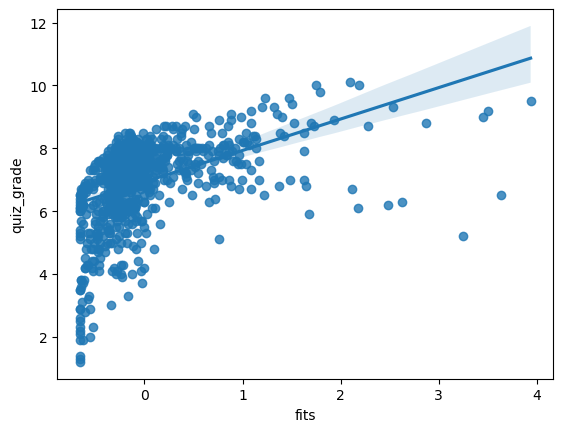

In [18]:
# import dataviz
import seaborn as sns

# plot model predicted values against true values
sns.regplot(x="fits", y="quiz_grade", data=model.data, fit_reg=True)

answer = """
Your answer here.
"""



### 1.6 Is this an appropriate method? Explain why or why not.

In [19]:
answer = """
Your answer here.
"""

#send(answer, 16) 

In [20]:
# Now do we same but this time have an intercept as well
model = Lm("quiz_grade ~ 1 + studying_hours", data=df)
model.fit()

Formula: quiz_grade~1+studying_hours

Family: gaussian	 Estimator: OLS

Std-errors: non-robust	CIs: standard 95%	Inference: parametric 

Number of observations: 810	 R^2: 0.204	 R^2_adj: 0.203

Log-likelihood: -1291.688 	 AIC: 2587.376	 BIC: 2596.770

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
Intercept,6.932,6.850,7.014,0.042,808,165.288,0.0,***
studying_hours,0.603,0.521,0.686,0.042,808,14.384,0.0,***


# Task 2: Linear Model with Fixed Effects
----------
### 2.1  Run a regression model to explain the effect of studying hours on quiz grade. Add fixed effects for group. 

In [21]:
# model_str = """Write your model here """
# send(model_str, 21)
# # Add the data and family
# model = Lm(model_str, data=, family= )

# # Fit the models
# print(model.fit())

### 2.2 Interpret the regression results. 
What changed? What does it mean to have group fixed effects? 

In [30]:
answer = """
Your answer here.
"""

send(answer, 22) 

NameError: name 'send' is not defined

# Task 3: Linear Model with Random Effects
----------
### 3.1  Run a regression model to explain the effect of studying hours on quiz grade. Add random intercept for group. 

In [31]:
# We again use LM to train a model but this time we add random intercept for group
model = Lmer("quiz_grade ~ studying_hours + (1|group)", data=df)

# Fit the models
print(model.fit())
model.ranef

Linear mixed model fit by REML [’lmerMod’]
Formula: quiz_grade~studying_hours+(1|group)

Family: gaussian	 Inference: parametric

Number of observations: 810	 Groups: {'group': 3.0}

Log-likelihood: -1282.909 	 AIC: 2573.817

Random effects:

                 Name    Var    Std
group     (Intercept)  0.084  0.289
Residual               1.369  1.170

No random effect correlations specified

Fixed effects:

                Estimate  2.5_ci  97.5_ci     SE       DF  T-stat  P-val  Sig
(Intercept)        6.927   6.589    7.264  0.172    2.004  40.249  0.001  ***
studying_hours     0.645   0.562    0.728  0.042  807.849  15.263  0.000  ***


,X.Intercept.
1,-0.320457
2,0.200180
3,0.120278


In [32]:
model.coefs

,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),6.926649,6.589351,7.263946,0.172094,2.004041,40.249269,6.091769e-04,***
studying_hours,0.644949,0.562128,0.727769,0.042256,807.849278,15.262826,2.109552e-46,***


### 3.2 Plot the regression lines
Hint: You may use model.plot

<Axes: xlabel='studying_hours', ylabel='quiz_grade'>

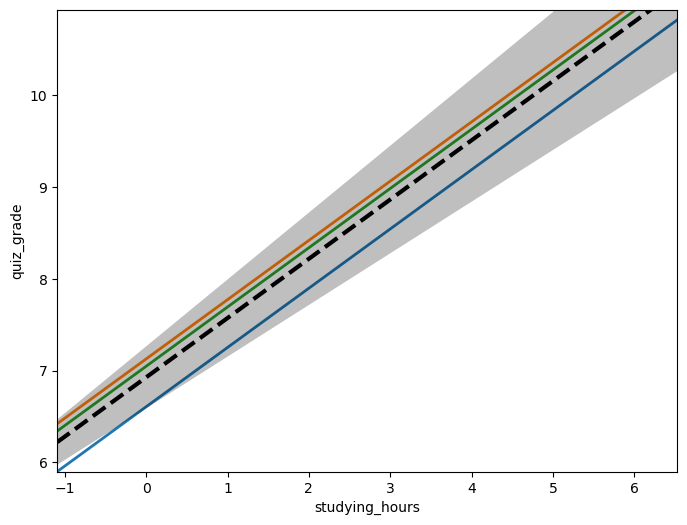

In [33]:
# plot model predicted values against true values
model.plot("studying_hours", plot_ci=True)

### 3.3  Run a regression model to explain the effect of studying hours on quiz grade. Add slope for group. 

In [34]:
model = Lmer("""quiz_grade ~ 1 + (0 + studying_hours|group)""", data=df, family='gaussian')

model.fit()

Linear mixed model fit by REML [’lmerMod’]
Formula: quiz_grade~1+(0+studying_hours|group)

Family: gaussian	 Inference: parametric

Number of observations: 810	 Groups: {'group': 3.0}

Log-likelihood: -1230.242 	 AIC: 2466.484

Random effects:

                    Name    Var    Std
group     studying_hours  0.362  0.602
Residual                  1.198  1.094

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),6.853,6.766,6.94,0.044,739.487,154.658,0.0,***


### 3.4 Plot the regression lines
Hint: You may use model.ranef

In [35]:
model.data.head()

,student,week,studying_hours,group,quiz_grade,residuals,fits
0,0,0,3.611569,3,6.1,-0.966341,7.066341
1,0,1,2.704121,3,7.0,-0.012762,7.012762
2,0,2,0.901324,3,6.9,-0.006318,6.906318
3,0,3,0.719834,3,7.0,0.104398,6.895602
4,0,4,0.707735,3,7.2,0.305112,6.894888


In [36]:
# Plot the regression lines for each group
# Get the intercept and slope for each group
intercept = model.coefs.Estimate['(Intercept)']
# Get the slope for each group
model.ranef

,studying_hours
1,1.021431
2,-0.010058
3,0.059044


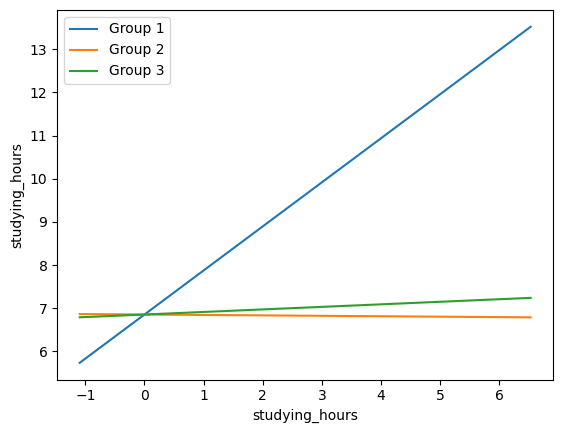

In [37]:
# Plot the regression lines for each group
for i, row in model.ranef.iterrows():
    slope = row['studying_hours']
    sns.lineplot(x=df['studying_hours'], y=intercept + slope * df['studying_hours'], label=f"Group {i}")

### 3.5  Run a regression model to explain the effect of studying hours on quiz grade. Add random intercept and slope for group. 

In [38]:
model = Lmer("""quiz_grade ~ (1 + studying_hours|group) """, data=df, family='gaussian')

# Fit the models
print(model.fit())

boundary (singular) fit: see help('isSingular') 

Linear mixed model fit by REML [’lmerMod’]
Formula: quiz_grade~(1+studying_hours|group)

Family: gaussian	 Inference: parametric

Number of observations: 810	 Groups: {'group': 3.0}

Log-likelihood: -1205.548 	 AIC: 2421.096

Random effects:

                    Name    Var    Std
group        (Intercept)  0.165  0.406
group     studying_hours  0.410  0.640
Residual                  1.124  1.060

               IV1             IV2  Corr
group  (Intercept)  studying_hours  -1.0

Fixed effects:

             Estimate  2.5_ci  97.5_ci    SE       DF   T-stat  P-val  Sig
(Intercept)      7.18   7.082    7.278  0.05  359.077  143.976    0.0  ***


### 3.6 Plot the regression lines

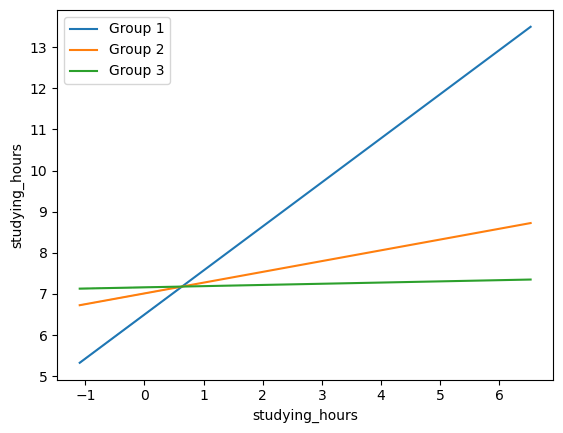

In [39]:
# Get fixed effect intercept
intercept = model.coefs.Estimate['(Intercept)']
for i, row in model.ranef.iterrows():
    slope = row['studying_hours']
    intercept_for_group = row['X.Intercept.'] + intercept
    sns.lineplot(x=df['studying_hours'], y=intercept_for_group + slope * df['studying_hours'], label=f"Group {i}")


### 3.7 Interpret the regression results. 
What changed? What does it mean to have group random effects? 

In [40]:
answer = """
Effects are fixed if they are interesting in themselves
or random if there is interest in the underlying population.
With intercept random effects, we assumed that every group has a different starting 
point (y-intercept) and with slope random effects we assume that every group has a different rate.  
"""

# Task 4: Mixed Model with Time Interaction 
----------
### 4.1  Lastly, run a regression model to explain the effect of studying hours on quiz grade. Add random intercept and slope for groups AND interaction between the number of stuyding hours and time (weeks). 


In [41]:
model = Lmer("""quiz_grade ~  (1 + studying_hours*week|group) """, data=df, family='gaussian')

# Fit the models
print(model.fit())

boundary (singular) fit: see help('isSingular') 

Linear mixed model fit by REML [’lmerMod’]
Formula: quiz_grade~(1+studying_hours*week|group)

Family: gaussian	 Inference: parametric

Number of observations: 810	 Groups: {'group': 3.0}

Log-likelihood: -845.316 	 AIC: 1714.632

Random effects:

                         Name    Var    Std
group             (Intercept)  1.529  1.237
group          studying_hours  1.510  1.229
group                    week  0.011  0.107
group     studying_hours:week  0.005  0.071
Residual                       0.447  0.668

                  IV1                  IV2   Corr
group     (Intercept)       studying_hours -0.732
group     (Intercept)                 week -0.976
group     (Intercept)  studying_hours:week -0.045
group  studying_hours                 week  0.604
group  studying_hours  studying_hours:week -0.578
group            week  studying_hours:week  0.252

Fixed effects:

             Estimate  2.5_ci  97.5_ci     SE      DF   T-stat  P-val  

### 4.2 Interpret the regression results.  

In [42]:
answer = """
Your answer here.
"""

send(answer, 42) 

NameError: name 'send' is not defined

### Time series prediction, use data from week 1 to 5 to predict quiz grade in week 6.

In [43]:
# split the data into test and train, make sure no student is in both
from sklearn.model_selection import train_test_split
students = df['student'].unique()
train_students, test_students = train_test_split(students, test_size=0.2, random_state=42)
train_df = df[df['student'].isin(train_students)]
test_df = df[df['student'].isin(test_students)]

In [44]:
test_df.columns

Index(['student', 'week', 'studying_hours', 'group', 'quiz_grade'], dtype='object')

In [45]:
train_df.columns

Index(['student', 'week', 'studying_hours', 'group', 'quiz_grade'], dtype='object')

In [46]:
# is there any week in the train set that is not in the test set?
print(set(train_df['week']) - set(test_df['week']))
# and the other way?
set(test_df['week']) - set(train_df['week'])

set()


set()

In [47]:
# same for groups
train_groups = train_df['group'].unique()
test_groups = test_df['group'].unique()
print(set(train_groups) - set(test_groups))
print(set(test_groups) - set(train_groups))

set()
set()


In [48]:
#https://stats.stackexchange.com/questions/228800/crossed-vs-nested-random-effects-how-do-they-differ-and-how-are-they-specified

# Fit the model
model = Lmer("""quiz_grade ~  (1 + studying_hours|group/week)""", data=train_df, family='gaussian')

model.fit()

unable to evaluate scaled gradient 

Model failed to converge: degenerate  Hessian with 1 negative eigenvalues 

Linear mixed model fit by REML [’lmerMod’]
Formula: quiz_grade~(1+studying_hours|group/week)

Family: gaussian	 Inference: parametric

Number of observations: 648	 Groups: {'week:group': 81.0, 'group': 3.0}

Log-likelihood: -637.662 	 AIC: 1291.323

Random effects:

                      Name    Var    Std
week:group     (Intercept)  1.033  1.016
week:group  studying_hours  0.022  0.148
group          (Intercept)  0.000  0.002
group       studying_hours  0.221  0.470
Residual                    0.264  0.514

                    IV1             IV2   Corr
week:group  (Intercept)  studying_hours -0.840
group       (Intercept)  studying_hours  0.639

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),6.984,6.757,7.211,0.116,67.072,60.397,0.0,***


In [49]:
model.ranef

[      X.Intercept.  studying_hours
 0:1      -3.677916        0.472989
 0:2      -2.773193        0.342595
 0:3      -3.598368        0.368292
 1:1      -2.406989        0.314168
 1:2      -1.719151        0.208911
 ...            ...             ...
 25:2      1.052767       -0.137809
 25:3     -0.263527        0.040070
 26:1     -0.564400        0.105979
 26:2      1.069648       -0.126750
 26:3     -0.336571        0.055330
 
 [81 rows x 2 columns],
    X.Intercept.  studying_hours
 1      0.001206        0.474394
 2      0.001556        0.605604
 3      0.000555        0.216223]

In [50]:
test_df

,student,week,studying_hours,group,quiz_grade
216,8,0,2.776717,3,5.9
217,8,1,1.191707,3,6.4
218,8,2,1.046516,3,6.8
219,8,3,0.901324,3,7.2
220,8,4,0.852927,3,7.5
...,...,...,...,...,...
751,27,22,1.796673,1,9.2
752,27,23,1.990262,1,9.3
753,27,24,2.195950,1,9.3
754,27,25,2.486333,1,9.4


/var/folders/75/94jyvgc92_gcwmzgrg36xfd00000gn/T/ipykernel_39414/4215418058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['predicted_grade'] = model.predict(test_df, verify_predictions=False, skip_data_checks=True)


<Axes: xlabel='predicted_grade', ylabel='quiz_grade'>

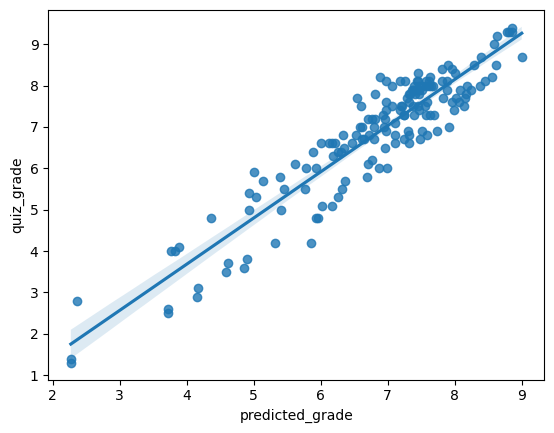

In [51]:
# Get the predicted values for week 6
test_df['predicted_grade'] = model.predict(test_df, verify_predictions=False, skip_data_checks=True)

# Plot the predicted values against the true values
sns.regplot(x="predicted_grade", y="quiz_grade", data=test_df, fit_reg=True)

In [52]:
test_df

,student,week,studying_hours,group,quiz_grade,predicted_grade
216,8,0,2.776717,3,5.9,5.009169
217,8,1,1.191707,3,6.4,6.253563
218,8,2,1.046516,3,6.8,6.724140
219,8,3,0.901324,3,7.2,6.958203
220,8,4,0.852927,3,7.5,7.059246
...,...,...,...,...,...,...
751,27,22,1.796673,1,9.2,8.624628
752,27,23,1.990262,1,9.3,8.782612
753,27,24,2.195950,1,9.3,8.804080
754,27,25,2.486333,1,9.4,8.846973


In [53]:
# RMSE error
from sklearn.metrics import mean_squared_error
mean_squared_error(test_df['quiz_grade'], test_df['predicted_grade'], squared=False)


0.5958703953755589

In [63]:
####
df_week_1_to_20 = df[df['week'] < 20]
df_week_21 = df[df['week'] == 21]

model = Lmer("""quiz_grade ~  (1 + studying_hours*week|student)""", data=df_week_1_to_20, family='gaussian')
model.fit()

boundary (singular) fit: see help('isSingular') 

Linear mixed model fit by REML [’lmerMod’]
Formula: quiz_grade~(1+studying_hours*week|student)

Family: gaussian	 Inference: parametric

Number of observations: 600	 Groups: {'student': 30.0}

Log-likelihood: -412.354 	 AIC: 848.708

Random effects:

                         Name    Var    Std
student           (Intercept)  3.435  1.853
student        studying_hours  2.101  1.450
student                  week  0.024  0.155
student   studying_hours:week  0.014  0.119
Residual                       0.135  0.367

                    IV1                  IV2   Corr
student     (Intercept)       studying_hours -0.853
student     (Intercept)                 week -0.955
student     (Intercept)  studying_hours:week  0.303
student  studying_hours                 week  0.788
student  studying_hours  studying_hours:week -0.735
student            week  studying_hours:week -0.163

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),7.264,7.088,7.44,0.09,20.006,80.898,0.0,***


In [64]:
# predict the grades for week 21
df_week_21['predicted_grade'] = model.predict(df_week_21, verify_predictions=False)

# rmse
mean_squared_error(df_week_21['quiz_grade'], df_week_21['predicted_grade'], squared=False)

/var/folders/75/94jyvgc92_gcwmzgrg36xfd00000gn/T/ipykernel_39414/2747421564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week_21['predicted_grade'] = model.predict(df_week_21, verify_predictions=False)


0.8059897122963781

In [65]:
df_week_21

,student,week,studying_hours,group,quiz_grade,predicted_grade
21,0,21,-0.998268,3,6.8,6.857312
48,1,21,-0.792579,3,7.6,7.423117
75,2,21,-0.441699,2,8.0,8.809141
102,3,21,-0.441699,2,8.1,8.604812
129,4,21,0.877125,1,9.0,7.678877
156,5,21,-0.223912,2,8.0,8.849689
183,6,21,2.038659,1,9.6,7.247950
210,7,21,-0.707884,3,7.5,7.657877
237,8,21,-0.453799,3,8.0,7.705872
264,9,21,-0.381203,2,8.1,8.668698
